### Comparing OE plots

In [1]:
import pandas as pd

from netam import framework, models
from netam.framework import (
    trimmed_shm_model_outputs_of_crepe,
)

from epam.sequences import nt_subs_indicator_tensor_of

from shmex.shm_data import load_shmoof_dataframes, dataset_dict, pcp_df_of_non_shmoof_nickname
from shmex.shm_eval import ragged_np_pcp_encoding, oe_plot_of, optimized_branch_lengths_of_crepe

Using Metal Performance Shaders


In [2]:
def filter_to_nonzero_mutations(pcp_df):
    has_mutn = [nt_subs_indicator_tensor_of(parent, child).sum().item() > 0 for parent, child in zip(pcp_df["parent"], pcp_df["child"])]
    return pcp_df[has_mutn].copy().reset_index(drop=True)

In [3]:
site_count = 500
train_df, val_df = load_shmoof_dataframes(dataset_dict["shmoof"], val_nickname="small")
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
subsampled_train_df = train_df.iloc[::int(len(train_df)/5000)].copy().reset_index(drop=True)
tang_df = pcp_df_of_non_shmoof_nickname("tangshm")
subsampled_tang_df = tang_df.iloc[::int(len(tang_df)/4000)].copy().reset_index(drop=True)
sim_df = pd.read_csv("~/data/v0/mimic_shmoof_CNNJoiLrgShmoofSmall.10K.csv.gz", compression="gzip", index_col=0)
syn_10x_df = filter_to_nonzero_mutations(pcp_df_of_non_shmoof_nickname("syn10x"))
subsampled_syn_10x_df = syn_10x_df.iloc[::int(len(syn_10x_df)/4000)].copy().reset_index(drop=True)

data_dict = {"train": subsampled_train_df, "val": val_df, "tang": subsampled_tang_df, "sim": sim_df, "syn10x": subsampled_syn_10x_df}

Loading /Users/matsen/data/v1/tang-deepshm-oof_pcp_2024-04-09_MASKED_NI.csv.gz
Loading /Users/matsen/data/v0/wyatt-10x-1p5m_pcp_2023-11-30_NI_SYN.csv.gz


In [4]:
def oe_plot_of_crepe(crepe, pcp_df, branch_lengths, title):
    crepe.to("cpu")
    ratess, cspss = trimmed_shm_model_outputs_of_crepe(crepe, pcp_df["parent"])
    site_count = crepe.encoder.site_count
    mut_indicators, base_idxss, masks = ragged_np_pcp_encoding(pcp_df["parent"], pcp_df["child"], site_count)
    # You can manually set the binning if you want to
    # binning = np.linspace(-4, 0, 101)
    binning = None
    fig, oe_results = oe_plot_of(ratess, masks, branch_lengths, mut_indicators, title, binning=binning, restrict_to_shmoof_region=False)
    oe_results.pop("counts_twinx_ax")
    return fig, oe_results


In [5]:

def optimized_oe_plot(model_name, data_name):
    crepe_path = f"../train/trained_models/{model_name}-shmoof_small-full-0"
    crepe = framework.load_crepe(crepe_path)
    title = f"Optimized {model_name} on {data_name}"
    pcp_df = data_dict[data_name]
    optimized_bls = optimized_branch_lengths_of_crepe(crepe, pcp_df)
    oe_plot_of_crepe(crepe, pcp_df, optimized_bls, title)[0]

Finding optimal branch lengths: 100%|██████████| 2625/2625 [00:06<00:00, 417.21it/s]


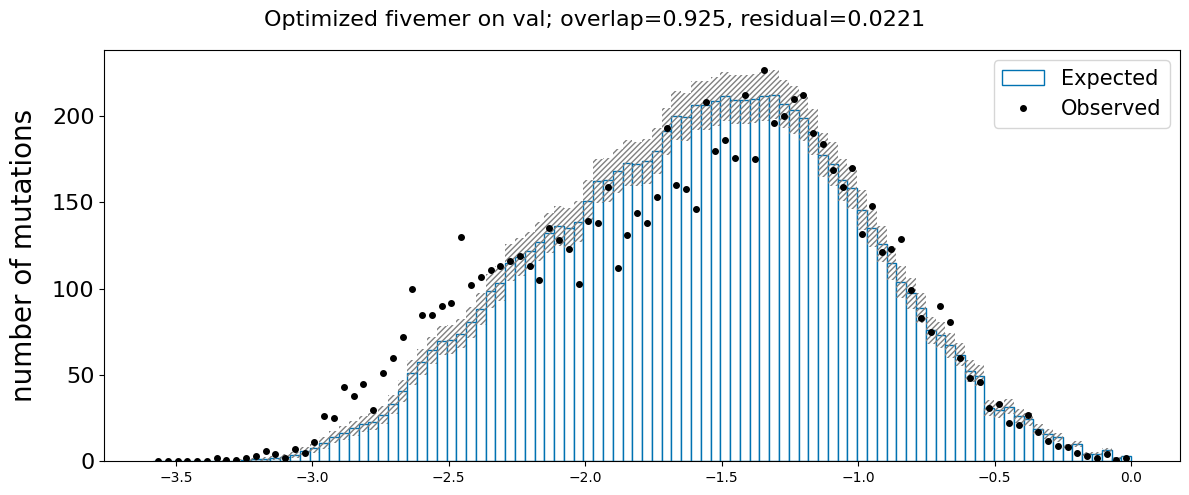

In [6]:
optimized_oe_plot("fivemer", "val")

Finding optimal branch lengths: 100%|██████████| 2625/2625 [00:08<00:00, 302.50it/s]


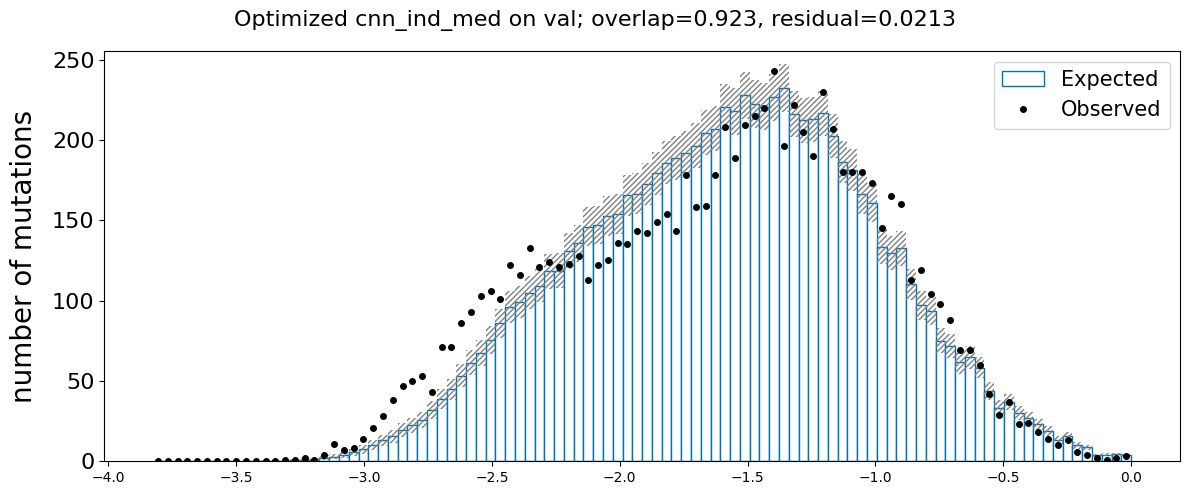

In [7]:
optimized_oe_plot("cnn_ind_med", "val")

Finding optimal branch lengths: 100%|██████████| 4992/4992 [00:09<00:00, 535.53it/s]


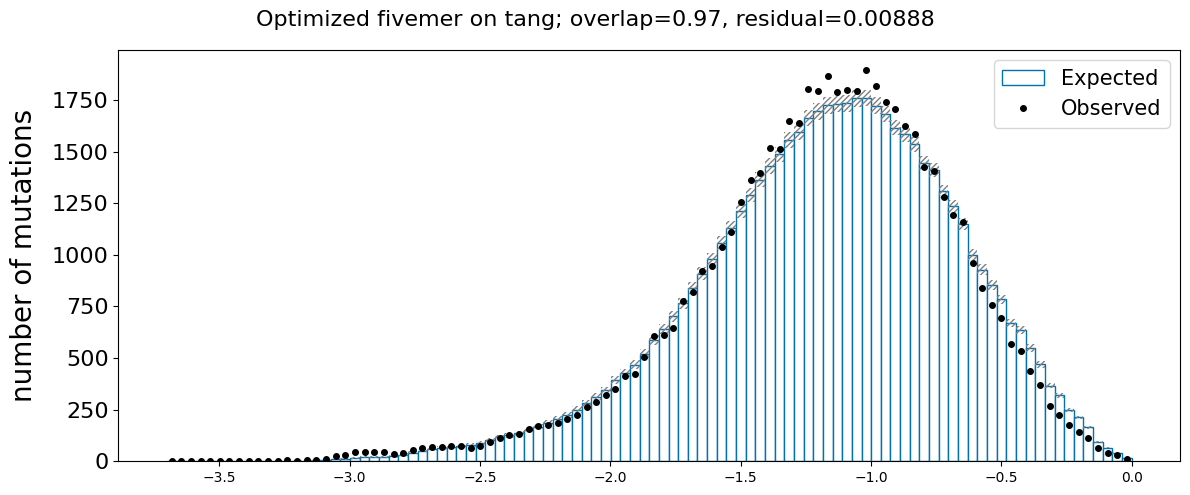

In [8]:
optimized_oe_plot("fivemer", "tang")

Finding optimal branch lengths: 100%|██████████| 4992/4992 [00:14<00:00, 349.46it/s]


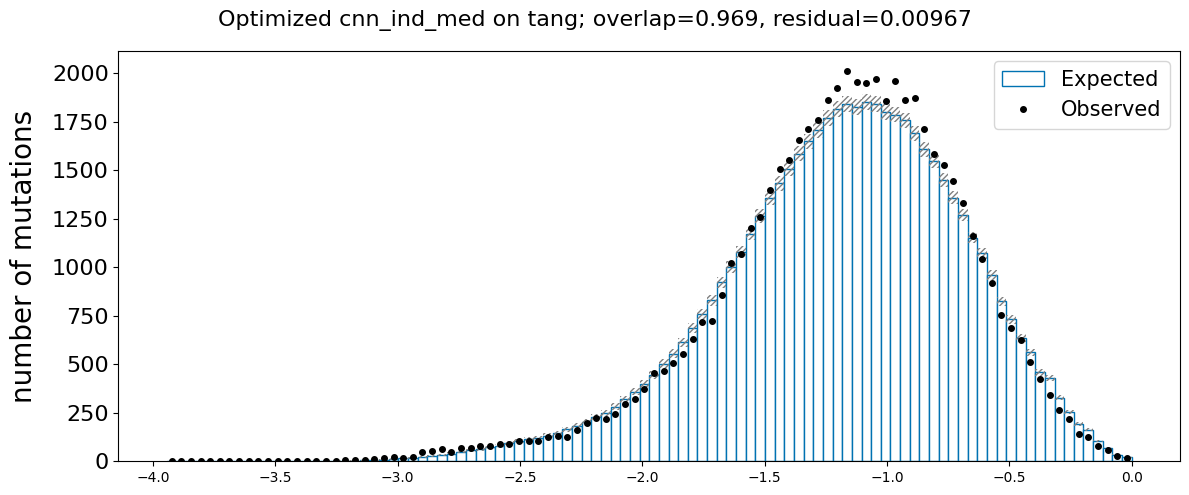

In [9]:
optimized_oe_plot("cnn_ind_med", "tang")

Finding optimal branch lengths: 100%|██████████| 4266/4266 [00:21<00:00, 200.59it/s]


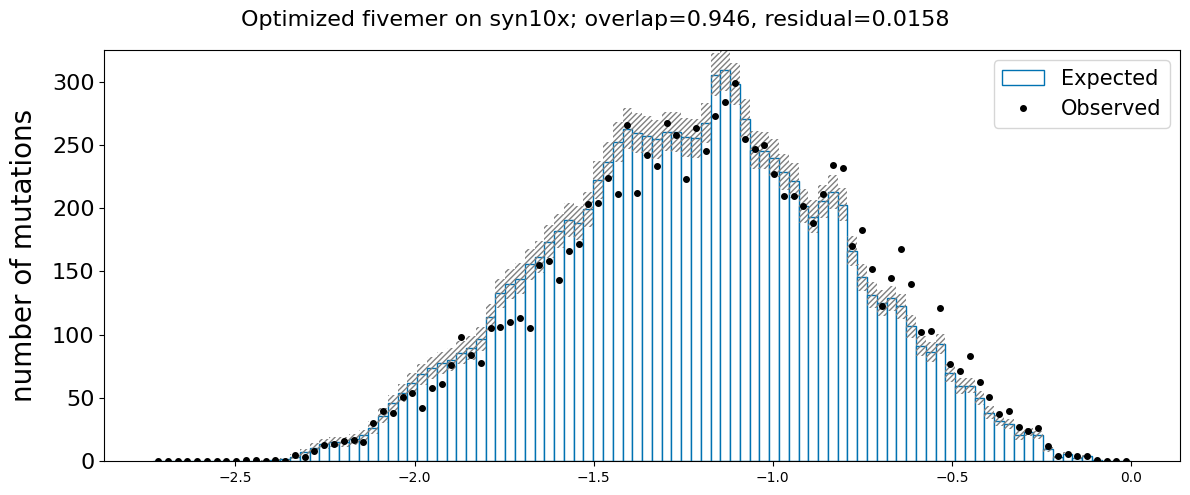

In [10]:
optimized_oe_plot("fivemer", "syn10x")

Finding optimal branch lengths: 100%|██████████| 4266/4266 [00:11<00:00, 361.72it/s]


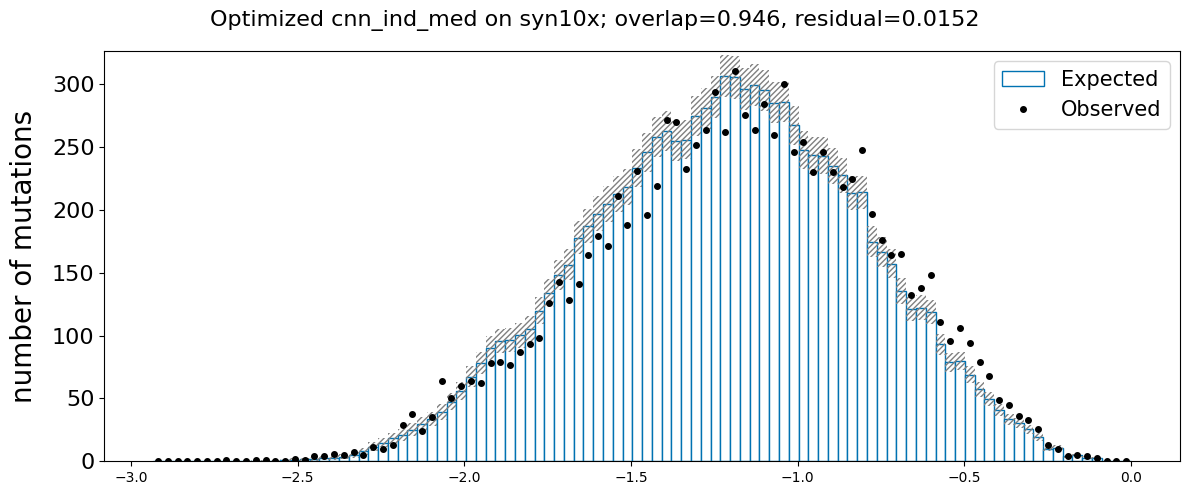

In [11]:
optimized_oe_plot("cnn_ind_med", "syn10x")

Finding optimal branch lengths: 100%|██████████| 10000/10000 [00:22<00:00, 452.07it/s]


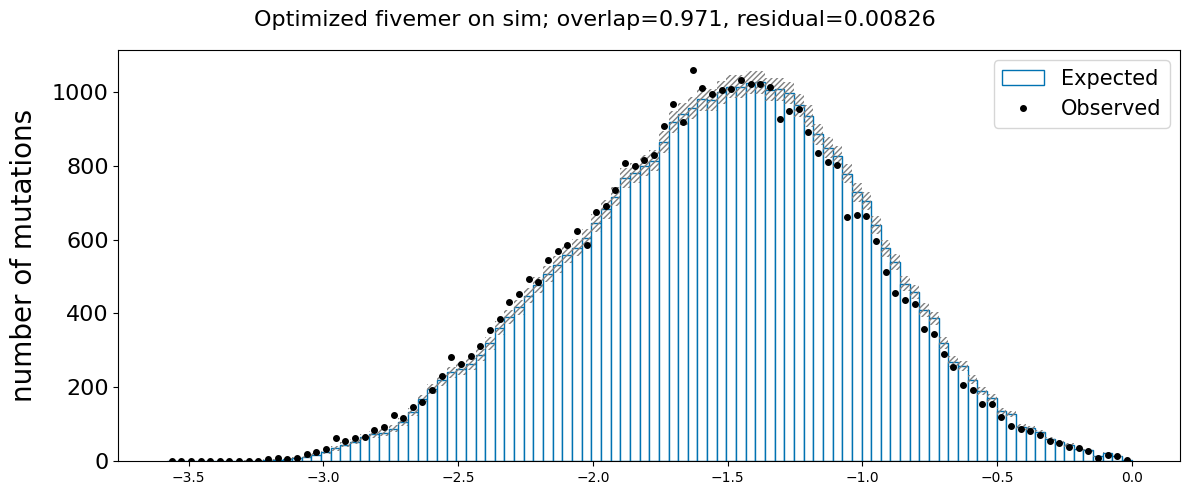

In [12]:
optimized_oe_plot("fivemer", "sim")

Finding optimal branch lengths: 100%|██████████| 10000/10000 [00:33<00:00, 298.77it/s]


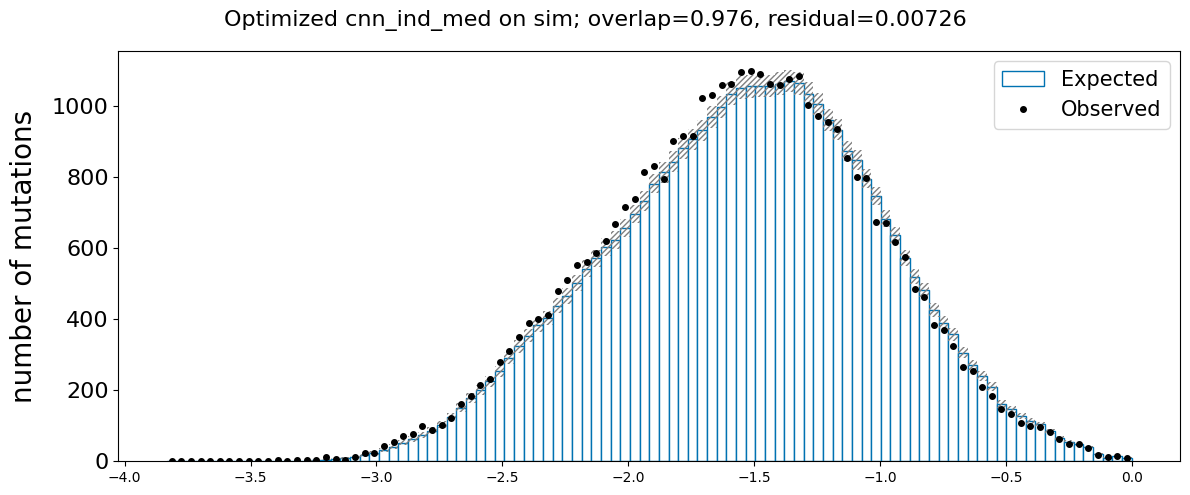

In [13]:
optimized_oe_plot("cnn_ind_med", "sim")